## Hamza Mustafa
### Final Project

In [53]:
# Load Packages
import os
import math
import random
import numpy as np
import pandas as pd
import sklearn as sk

### The goal of this code is to identify countries as food suppliers (with extraneous resources) or food receivers (those with food scarcity)

In [54]:
# We manually added some information to the dataset including GDP, infant mortality rate, and life expectancy

# Extended Dataset path
dataset_path = "processed_data/Extended_Dataset.csv"

# Load csv file into a dataframe
df = pd.read_csv(dataset_path)

#Select desired columns
clean_df = df[['Country', 'Tons of food scarcity', 'Tons of surplus food']].copy()

clean_df['sub'] = clean_df['Tons of surplus food']-clean_df['Tons of food scarcity']

clean_df.head()

,Country,Tons of food scarcity,Tons of surplus food,sub
0,Afghanistan,18414379,1852067.5,-16562311.5
1,Albania,597953,141775.0,-456178.0
2,Algeria,5572676,2295944.5,-3276731.5
3,Andorra,0,3742.5,3742.5
4,Angola,17532405,1833639.0,-15698766.0


In [55]:

negative_values = clean_df[clean_df['sub'] < 0]['sub']

# Find maximum and minimum values among negative numbers
max_negative = negative_values.max()
min_negative = negative_values.min()

positive_values = clean_df[clean_df['sub'] >= 0]['sub']
max_positive = positive_values.max()
min_positive = positive_values.min()

a = 0.01
b = 20

c = -20
d = -0.01

clean_df['normalized_sub'] = clean_df['sub'].apply(lambda x: ((x - min_positive) / (max_positive - min_positive)) * (b - a) + a if x >= 0 else (x - min_negative) / (max_negative - min_negative) * (d - c) + c)

In [56]:
# clean_df.style

In [57]:
t1 = -1

print(math.floor(t1*10))

-10


In [58]:

#Select desired columns
norm_df = clean_df[['Country', 'normalized_sub']].copy()
#norm_df.style

norm_df['classification'] = norm_df['normalized_sub'].apply(lambda x: math.ceil(x) if x >= 0 else math.floor(x))

In [59]:
#Outputs
y = norm_df['classification'].copy()
print(y)

0     -6
1     -1
2     -2
3      1
4     -6
      ..
207    1
208   -1
209    1
210   -3
211   -3
Name: classification, Length: 212, dtype: int64


In [60]:
#Select desired columns
x_df = df[['GDP per Capita', 'Population', 'Infant Mortality Rate', 'Life Expectancy']].copy()

#Find average Infant Mortality Rate
avg_mr = x_df['Infant Mortality Rate'].mean(axis = 0)

#Set nan values to average rate
x_df['Infant Mortality Rate'] = x_df['Infant Mortality Rate'].fillna(avg_mr)

#Find average Life Expectancy
avg_le = x_df['Life Expectancy'].mean(axis = 0)

#Set nan values to average Life Life Expectancy
x_df['Life Expectancy'] = x_df['Life Expectancy'].fillna(avg_le)

x = x_df

In [61]:
#x_df.style

#Create training data using sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Tree Creation

[Text(0.6353125, 0.9583333333333334, 'GDP per Capita <= 29910.735\ngini = 0.7\nsamples = 100.0%\nvalue = [0.006, 0.012, 0.006, 0.006, 0.006, 0.006, 0.006, 0.012\n0.03, 0.012, 0.041, 0.083, 0.343, 0.414, 0.006, 0.006\n0.006]'),
 Text(0.350625, 0.875, 'Population <= 8067596.5\ngini = 0.747\nsamples = 72.2%\nvalue = [0.008, 0.016, 0.008, 0.008, 0.008, 0.008, 0.008, 0.016\n0.041, 0.016, 0.049, 0.115, 0.402, 0.27, 0.008, 0.008\n0.008]'),
 Text(0.09, 0.7916666666666666, 'Infant Mortality Rate <= 14.85\ngini = 0.443\nsamples = 33.7%\nvalue = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.018, 0.684, 0.298, 0.0, 0.0, 0.0]'),
 Text(0.02666666666666667, 0.7083333333333334, 'Population <= 74825.5\ngini = 0.137\nsamples = 16.0%\nvalue = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.926, 0.074, 0.0, 0.0, 0.0]'),
 Text(0.013333333333333334, 0.625, 'gini = 0.0\nsamples = 0.6%\nvalue = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]'),


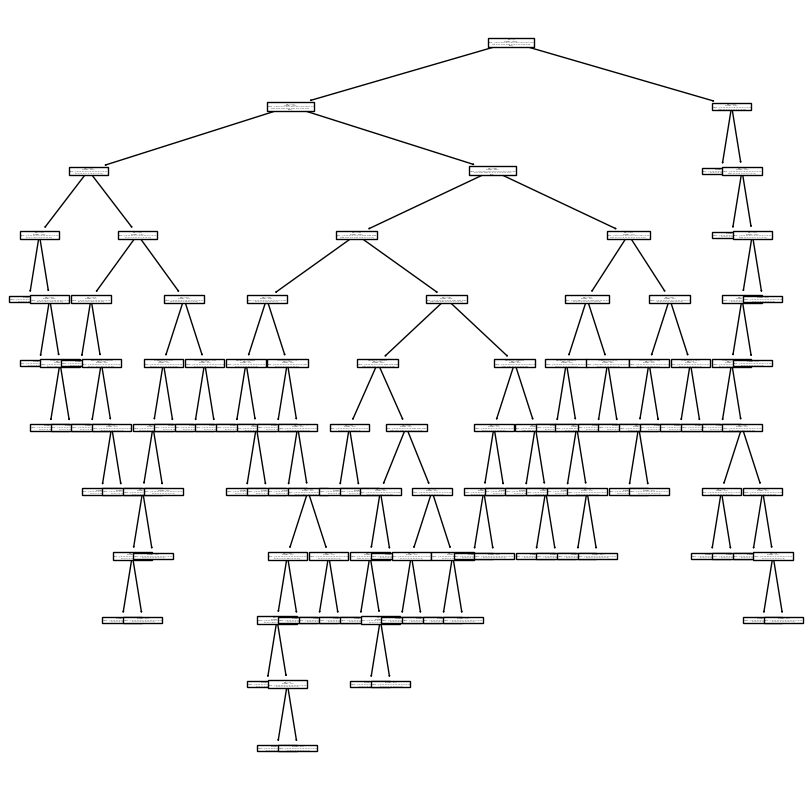

In [62]:
from sklearn import tree
from matplotlib import pyplot as plt

#Create Tree Classifier
class_tree = tree.DecisionTreeClassifier()
class_tree = class_tree.fit(x_train, y_train)

#Plot Tree, adjust DPI and figure size
#plt.figure(figsize=(20, 20), dpi=1800)

plt.figure(figsize=(10, 10), dpi=100)
tree.plot_tree(class_tree, label='all', feature_names=('GDP per Capita', 'Population', 'Infant Mortality Rate', 'Life Expectancy'), proportion=True)

In [63]:
y_pred = class_tree.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Tree Classifier:", "{:.2f}%".format(accuracy*100))



Accuracy of Tree Classifier: 51.16%


## Now creating a Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier as rfc

#Create Forest Classifier
class_forest = rfc(n_estimators=50, max_leaf_nodes=15)
class_forest = class_forest.fit(x_train, y_train)

#Create Prediction Data
y_pred_forest = class_forest.predict(x_test)

score = accuracy_score(y_test, y_pred_forest)
print('The accuracy of this Forest model is: ', "{:.2f}%".format(100*score))

The accuracy of this Forest model is:  53.49%
